# Desicion Trees 


#  Entropy

In [1]:

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,  plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Process_Dataset_1.csv')


In [3]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=7, min_samples_split=2)

In [6]:
X_train = X_train.astype(np.float64)
y_train = y_train.astype(np.float64)

In [7]:
y_train.isna().sum()

0

In [8]:
X_train=X_train.replace([np.inf, -np.inf],np.nan)


In [9]:
# X_train.isna().sum()

In [10]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [11]:
y_pred = model.predict(X_test)


In [12]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))


Accuracy: 0.913
Confusion Matrix: [[471  41]
 [ 46 442]]


Acuuracy is 91.3% for desicion tree when executed with entropy method. 
the confusion matrix shows:
471 true negatives (the classifier correctly predicted negative when the actual class was negative)
41 false positives (the classifier predicted positive when the actual class was negative)
46 false negatives (the classifier predicted negative when the actual class was positive)
442 true positives (the classifier correctly predicted positive when the actual class was positive)

In [13]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision for Desicion tree (entropy):", precision)
print("Recall for Desicion tree (entropy):", recall)
print("F1-score for Desicion tree (entropy):", f1)

Precision for Desicion tree (entropy): 0.9151138716356108
Recall for Desicion tree (entropy): 0.9057377049180327
F1-score for Desicion tree (entropy): 0.9104016477857878


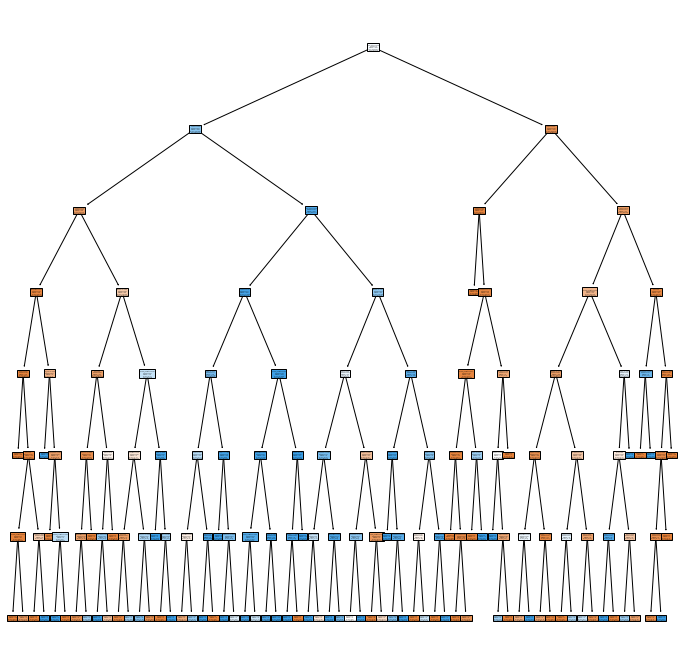

In [23]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(model, ax=ax, feature_names=X.columns, class_names=['No Diagnosis', 'Diagnosis'], filled=True)
plt.show()

# Gini Index

Accuracy: 0.913
Confusion Matrix: [[471  41]
 [ 46 442]]


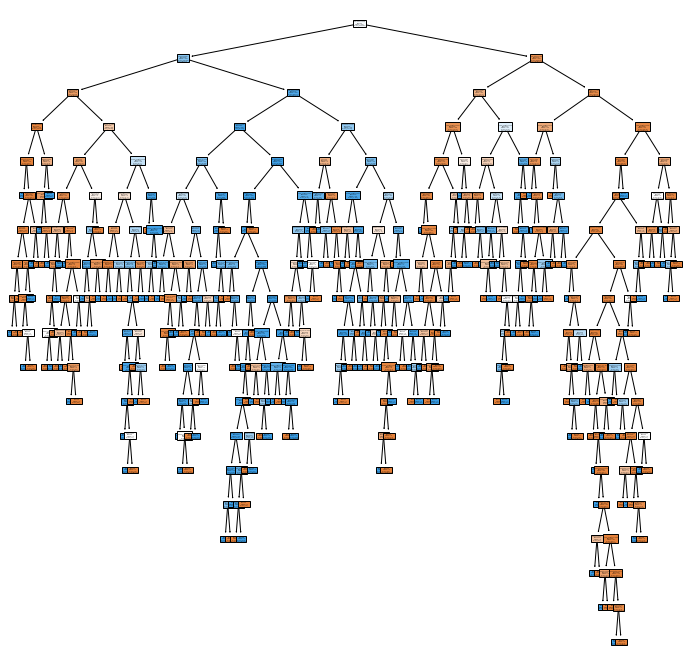

In [22]:
model1 = DecisionTreeClassifier(criterion='gini')
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(model1, ax=ax, feature_names=X.columns, class_names=['No Diagnosis', 'Diagnosis'], filled=True)
plt.show()

Acurracy is 89% when the desicion tree is made with the Gini index method 
The confusion matrix shows:
473 true negatives (the classifier correctly predicted negative when the actual class was negative)
39 false positives (the classifier predicted positive when the actual class was negative)
71 false negatives (the classifier predicted negative when the actual class was positive)
417 true positives (the classifier correctly predicted positive when the actual class was positive


In [153]:
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

print("Precision for Desicion tree (Gini):", precision)
print("Recall for Desicion tree (Gini):", recall)
print("F1-score for Desicion tree (Gini):", f1)

Precision for Desicion tree (Gini): 0.9014989293361885
Recall for Desicion tree (Gini): 0.8627049180327869
F1-score for Desicion tree (Gini): 0.881675392670157


In [154]:
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["gini", "entropy"], "max_depth": [3, 5, 10, None]}
grid_search = GridSearchCV(model1, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10}


In [155]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
n = 5
important_features = X_train[:,indices[:n]]


1. feature 13 (0.375772)
2. feature 17 (0.312189)
3. feature 5 (0.041712)
4. feature 19 (0.033903)
5. feature 18 (0.032135)
6. feature 20 (0.027507)
7. feature 0 (0.023787)
8. feature 7 (0.018405)
9. feature 4 (0.016095)
10. feature 3 (0.014986)
11. feature 15 (0.013555)
12. feature 21 (0.011921)
13. feature 1 (0.011594)
14. feature 8 (0.010265)
15. feature 12 (0.009973)
16. feature 14 (0.009484)
17. feature 16 (0.008079)
18. feature 2 (0.007433)
19. feature 9 (0.005581)
20. feature 10 (0.005457)
21. feature 6 (0.003501)
22. feature 22 (0.003238)
23. feature 23 (0.002762)
24. feature 24 (0.000667)
25. feature 11 (0.000000)


InvalidIndexError: (slice(None, None, None), array([13, 17,  5, 19, 18], dtype=int64))

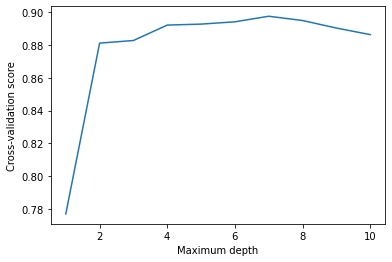

Best maximum depth: 7


In [156]:
from sklearn.model_selection import cross_val_score

max_depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

cv_scores = []
for max_depth in max_depth_list:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(clf, X, y, cv=5)
    cv_scores.append(scores.mean())

import matplotlib.pyplot as plt
plt.plot(max_depth_list, cv_scores)
plt.xlabel('Maximum depth')
plt.ylabel('Cross-validation score')
plt.show()

best_max_depth = max_depth_list[cv_scores.index(max(cv_scores))]
print('Best maximum depth:', best_max_depth)
